# Practical 7

In this class, you will be asked to solve your first machine learning model, a Linear Regression model, with Sklearn.

First, you can explore a Linear Regression with Sklearn with a different dataset.

Good work!!

## 1 - Linear Regression with Sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("houses.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
livecode_data = data[['GrLivArea','SalePrice']]

livecode_data.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


### Exploring

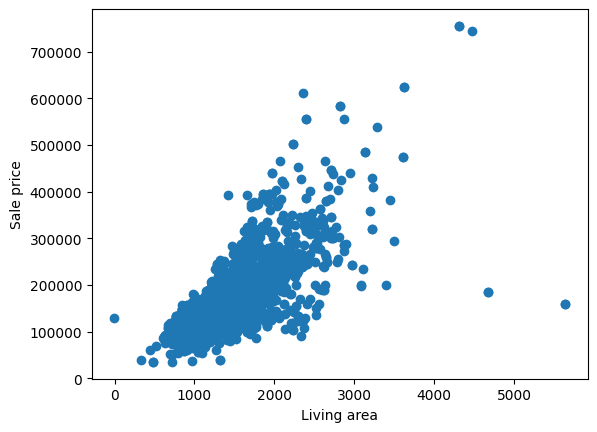

In [6]:
import matplotlib.pyplot as plt

# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

### Training

In [11]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = data[['GrLivArea']]
y = data['SalePrice']

# Train the model on the data
model.fit(X, y)

LinearRegression()

### Model Attributes

In [12]:
# View the model's slope (a)
model.coef_ 

array([105.00927564])

In [13]:
# View the model's intercept (b)
model.intercept_ 

np.float64(22104.12101002084)

### Scoring

In [14]:
# Evaluate the model's performance
model.score(X,y)

0.48960426399689116

### Predicting

In [18]:
#  Predict on new data
model.predict([[1000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127113.39664561])

# Generalization

### Splitting - The Holdout Method

In [19]:
from sklearn.model_selection import train_test_split

# split the data into train and test
train_data, test_data = train_test_split(livecode_data, test_size=0.3)

# Ready Xs and ys
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [20]:
# Ready X and y
X = livecode_data[['GrLivArea']]
y = livecode_data['SalePrice']

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
X_train

,GrLivArea
1281,1339
63,1710
1117,894
1085,996
1118,1601
...,...
716,2554
694,1539
1337,693
1060,1338


In [22]:
X_test

,GrLivArea
955,1958
1651,1718
173,1362
1172,1250
870,894
...,...
441,1440
577,1320
864,1372
783,1110


### Training and Scoring

In [23]:
# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

#  Predict on new data
model.predict([[1000]])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([126336.97066188])

### Random values generate different results each time

In [24]:
### RUN THIS CELL MULTIPLE TIMES TO SEE DIFFERENT SCORES

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

0.45045362532113353

# Cross Validation

In [25]:
from sklearn.model_selection import cross_validate

In [26]:
# Instanciate model
model = LinearRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5)

cv_results

{'fit_time': array([0.00178313, 0.00090504, 0.0010078 , 0.0006988 , 0.00064802]),
 'score_time': array([0.00068188, 0.00059485, 0.00055814, 0.00048685, 0.0004611 ]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [27]:
cv_results["test_score"]



array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])

In [28]:
cv_results["test_score"].mean()

np.float64(0.4863112208425962)

# Learning Curves with Sklearn

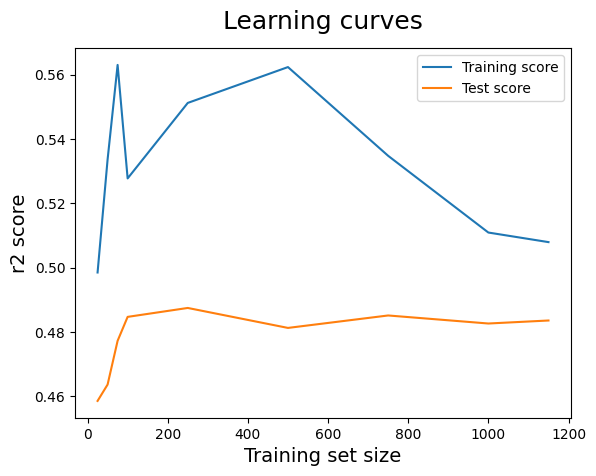

In [29]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

In [30]:
train_sizes

array([  25,   50,   75,  100,  250,  500,  750, 1000, 1150])

In [31]:
train_scores

array([[0.51071405, 0.49543383, 0.49543383, 0.49543383, 0.49543383],
       [0.59021136, 0.51944749, 0.51944749, 0.51944749, 0.51944749],
       [0.59537432, 0.55488807, 0.55488807, 0.55488807, 0.55488807],
       [0.5766314 , 0.51549801, 0.51549801, 0.51549801, 0.51549801],
       [0.51385625, 0.56050713, 0.56050713, 0.56050713, 0.56050713],
       [0.54769543, 0.56495786, 0.56630712, 0.56630712, 0.56630712],
       [0.51700005, 0.52848837, 0.54064102, 0.54379074, 0.54379074],
       [0.48457224, 0.491672  , 0.50236489, 0.53795744, 0.53795744],
       [0.48361962, 0.48957915, 0.49914166, 0.53303556, 0.53427557]])

In [32]:
test_scores

array([[0.50576369, 0.50153463, 0.46593325, 0.37913032, 0.44057681],
       [0.52575732, 0.52451774, 0.48191191, 0.35250443, 0.4336587 ],
       [0.55311867, 0.53262997, 0.49577621, 0.36493817, 0.43989393],
       [0.53525237, 0.53076047, 0.50559647, 0.39894464, 0.45294987],
       [0.56122721, 0.53453633, 0.50792623, 0.38652727, 0.44714895],
       [0.55670439, 0.53677235, 0.50644535, 0.36812148, 0.4383105 ],
       [0.56132103, 0.53394973, 0.50727362, 0.37861064, 0.44453992],
       [0.55941156, 0.52708568, 0.50558957, 0.37742765, 0.44368783],
       [0.55961001, 0.52786155, 0.50595894, 0.37894515, 0.44549517]])

In [33]:
test_scores_mean

array([0.45858774, 0.46367002, 0.47727139, 0.48470077, 0.4874732 ,
       0.48127082, 0.48513899, 0.48264046, 0.48357416])

## Now, it is your turn!!  

The Boston housing dataset was taken from the StatLib library, which is maintained at Carnegie Mellon University. This data is derived from information collected by the U.S. Census Service on Housing in the Boston MA Area. Below you find the description of the columns of the dataset:

In [44]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model, metrics
  
# load the boston dataset
boston_houses = pd.read_csv("boston_house_prices.csv", skiprows=1)


# check what the boston dataset contains
print(boston_houses.head(3))

# Store the boston characteristics in an `boston_df` DataFrame, with their names
boston_df = pd.DataFrame(boston_houses)
print(boston_df.head(3))

#it's missing MEDV
#add MEDV



#check if it's been added correctly



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  


In [1]:
# Check for missing values as the model does not drive with missing values


In [7]:
# Explore the correlation between variables. For example, plot LSTAT vs MEDV and RM vs MEDV. Interpret the visualizations.

In [9]:
# defining feature matrix(X) and response vector(y) and check the shape



In [10]:
# Preparing the data for training the model
#splitting X and y into training and testing sets

  
# create linear regression object

  
# train the model using the training sets

  
# regression coefficients

  
# variance score: 1 means perfect prediction

  



In [11]:
# model evaluation 



In [6]:
#Predict with the test dataset or with new input

